<a href="https://colab.research.google.com/github/sanjay235/Sketch2Color-anime-translation/blob/master/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importing libraries and data:

In [2]:
!pip install pyunpack

  Created wheel for pyunpack: filename=pyunpack-0.1.2-cp36-none-any.whl size=5162 sha256=d9d57cc8d38787098d66c1caf59245a4aa6449e7ec5dd9687befd1f68ad34b92
  Stored in directory: /root/.cache/pip/wheels/af/44/08/60613970881e542c0baad1f2dea5ed8e6716bc573f49197b7e
Successfully built pyunpack


In [0]:
from tensorflow.keras.models import save_model, load_model
import matplotlib.pyplot as plt
from pyunpack import Archive
from PIL import Image 
import numpy as np
import glob

In [4]:
"""
Getting access to the google drive in colab for the dataset. 
"""
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
"""
Extracting the data from compressed zip file.
"""
Archive('drive/My Drive/Sketch2Image/AnimeTestData.zip').extractall('.')

In [0]:
"""
Generating the paths for the black-and-white sketches.
"""
sketch_paths = glob.glob('Sketches/*.png')

sketch_paths = np.array(sketch_paths)

## 2. Generating the colored images:

In [0]:
# [4581, 8596, 7913, 9207, 9274, 9403, 6824, 9013, 10867, 2913]

In [0]:
def final_model(path):
  """
  A function to load the keras model from the given path.

  Parameters:
    path (string): The absolute path to the model to be loaded.

  Returns:
    keras.Model: The loaded keras model. 
  """

  return load_model(path)

def predict(test_skets, generator):
  """
  A function for predicting colors of input sketches using trained generator.

  Parameters:
    test_skets (numpy.array): The black-and-white sketches.
  """

  pred = generator.predict(test_skets)

  # Rescaling the generated color images and input sketches to the range [0, 255].
  pred = (pred+1)/2.0
  test_skets = (test_skets+1)/2.0

  # Displaying the generated color images from the generator.
  f, a = plt.subplots(test_skets.shape[0], 2, figsize=(1.2 * 15, 6 * 15))
  a = a.flatten()

  idx = 0
  
  for sket, pic in zip(test_skets, pred):
    a[idx].imshow(sket)
    a[idx].axis('off')

    a[idx+1].imshow(pic)
    a[idx+1].axis('off')
    
    idx += 2

  plt.subplots_adjust(wspace=.01, hspace=.1)
  plt.show()

In [0]:
!rm -rf Images/*

In [0]:
"""
Loading the random `K` test sketches into the memory.
"""
sketches = []

for sket in sketch_paths:
    sketches.append(np.array(Image.open(sket).convert('RGB')))

sketches = (np.array(sketches, dtype='float32')-127.5)/127.5

In [24]:
generator = final_model(path='drive/My Drive/Sketch2Image/BestModels/generator_model_043.h5')

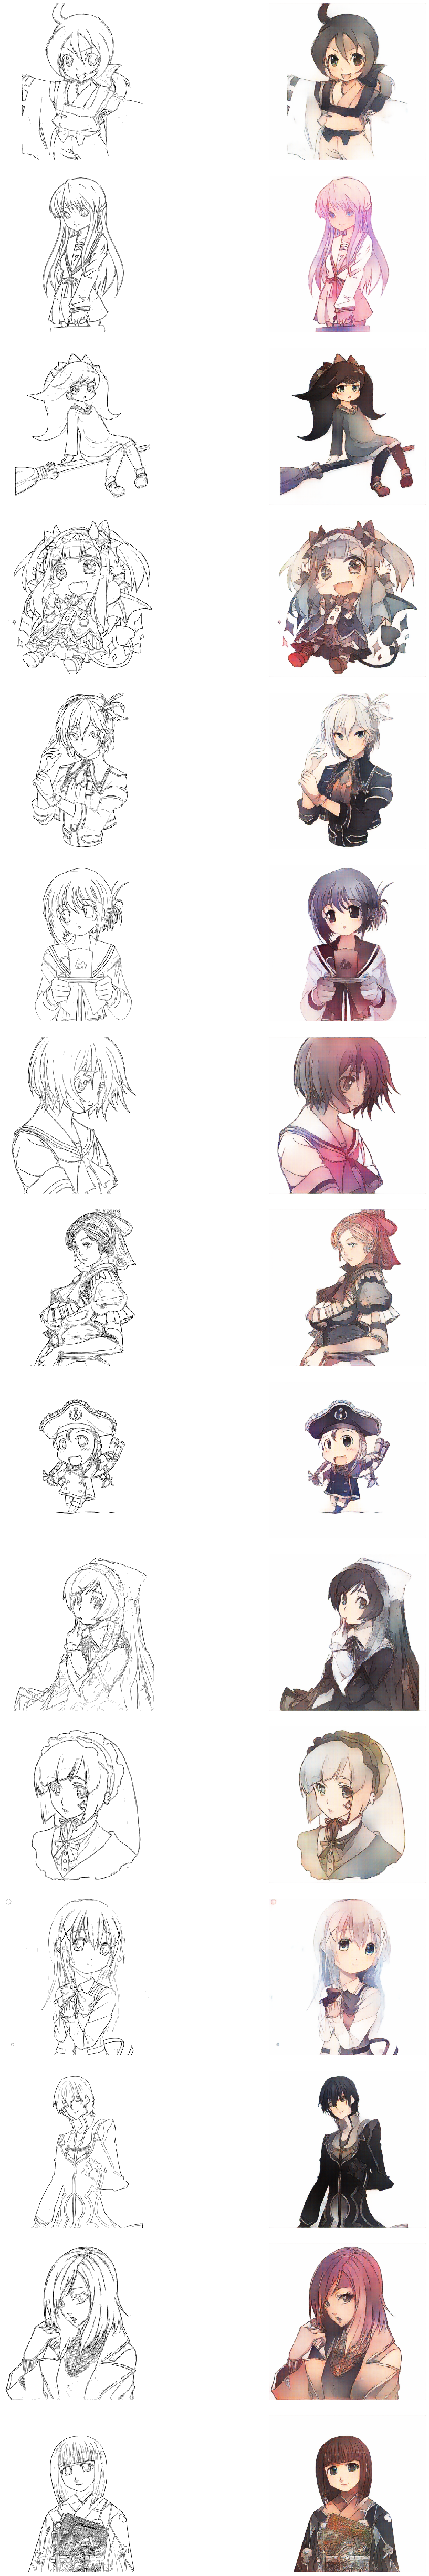

In [32]:
predict(sketches, generator)

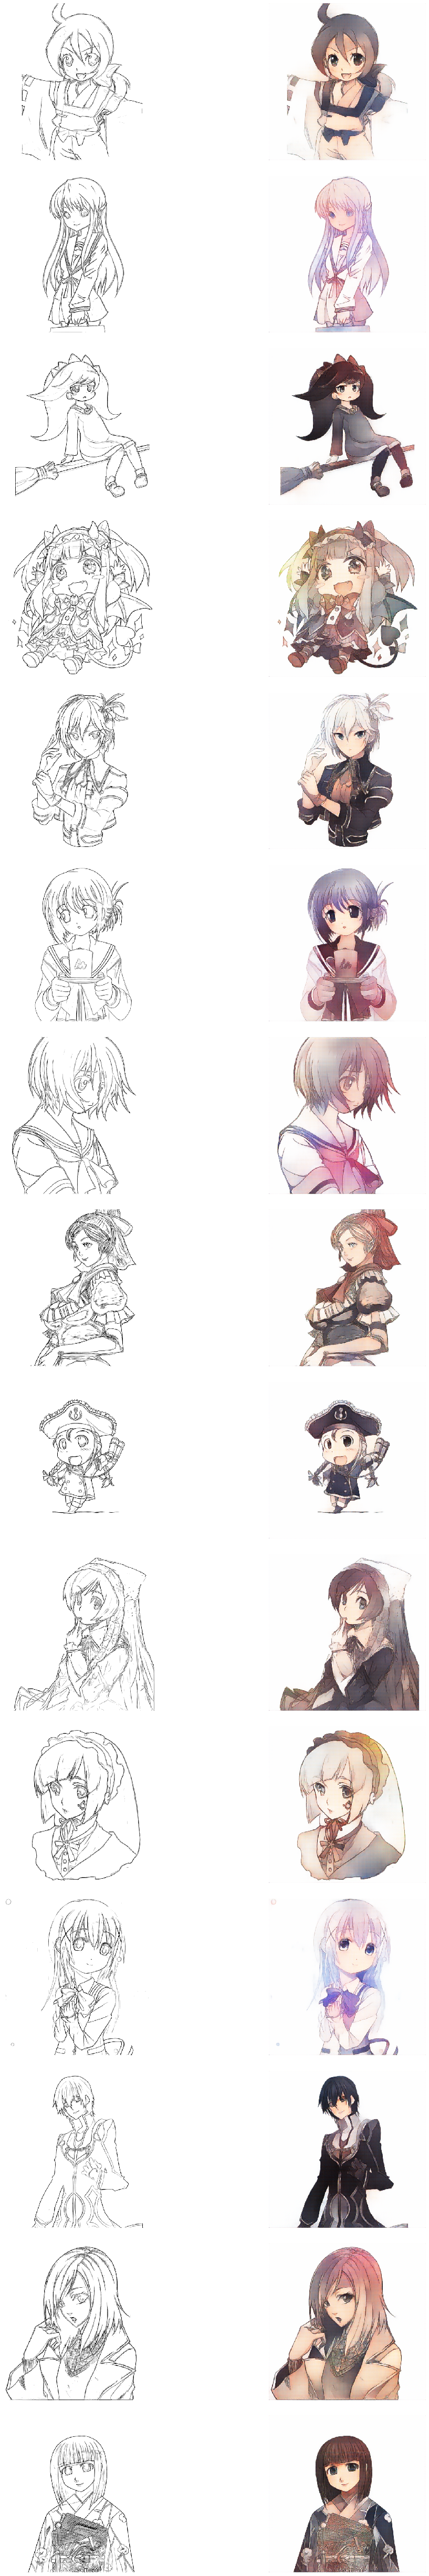

In [35]:
generator = final_model(path='drive/My Drive/Sketch2Image/BestModels/generator_model_034.h5')

predict(sketches, generator)